In [1]:
# NO CODE

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

## Normal Approximation ##

In this section we will use the Central Limit Theorem and the standard normal curve to approximate probabilities.

To get started, note that whether a histogram looks bell-shaped or whether it is skewed in one direction or another doesn't depend on the units in which the variable is measured. So data scientists use a special scale that doesn't depend on the units of measurement and can be used for measuring any random quantity.

This scale is called the *standard units* scale. 

### Standard Units ###

Let $X$ be any random variable with $E(X) = \mu$ and $SD(X) = \sigma$. We will now create a random variable $X^*$ that is $X$ in new units of measurement. The new units are defined as follows:

- $E(X)$ becomes the new origin
- $SD(X)$ becomes the new unit distance

Thus while $X$ could be the answer to "How many pounds?" or "How many miles?", $X^*$ is the answer to "How many SDs above the expected value?"

The new random variable $X^*$ is called $X$ in *standard units*, and is defined by

$$
X^* = \frac{X - \mu}{\sigma}
$$

The relation above allows you to convert $X$ to standard units. You can invert this to recover the value of $X$ from standard units:

$$
X =  X^*\sigma + \mu
$$

This simply expresses what $X^*$ measures: if $X$ in standard units is $X^*$, then the value of $X$ is $X^*$ SDs above the expected value.

The figure below shows the correspondence between the two scales.

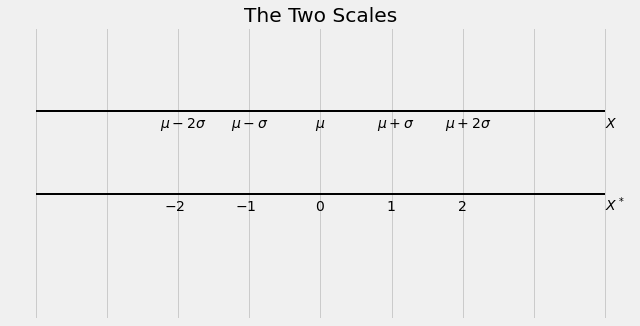

In [2]:
# NO CODE

plt.figure(figsize=(10, 5))
plt.plot([-4, 4], [0, 0], color='k', lw=2)
plt.plot([-4, 4], [-1, -1], color='k', lw=2)
plt.ylim(-2.5, 1)
plt.yticks([])
plt.text(-0.08, -0.2, '$\mu$')
plt.text(-2.25, -0.2, '$\mu-2\sigma$')
plt.text(-1.25, -0.2, '$\mu-\sigma$')
plt.text(0.8, -0.2, '$\mu+\sigma$')
plt.text(1.75, -0.2, '$\mu+2\sigma$')
plt.text(4, -0.2, '$X$')
plt.text(-0.08, -1.2, '$0$')
plt.text(-2.2, -1.2, '$-2$')
plt.text(-1.2, -1.2, '$-1$')
plt.text(0.92, -1.2, '$1$')
plt.text(1.92, -1.2, '$2$')
plt.text(4, -1.2, '$X^*$')
plt.xticks(np.arange(-4, 4.1), 9*[''])
plt.title('The Two Scales');

For example, suppose $X$ is a random weight in pounds, with $E(X) = 150$ pounds and $SD(X) = 20$ pounds. If $X^*$ is $X$ in standard units, then:

- $X = 170$ pounds is equivalent to $X^* = 1$.
- $X = 100$ pounds is equivalent to $X^* = \frac{100 - 150}{20} = -2.5$.
- $X^* = 1.2$ is equivalent to $X = 1.2(20) + 150 = 174$ pounds.

#### Properties of Standard Units ####

- If the value of $X$ is below the expectation, then $X^*$ is negative.
- $X^*$ is a linear transformation of $X$. It follows that $E(X^*) = 0$ and $SD(X^*) = 1$.
- By Chebyshev's inequality, values of $X^*$ are very likely to be in the range $-5$ to $5$.

### Standard Normal Curve, Revisited ###

If a random variable has a bell-shaped distribution and has been measured in standard units, then its histogram looks like the standard normal curve.

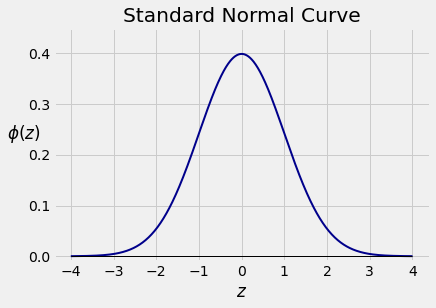

In [3]:
# NO CODE

# NO CODE

z = np.arange(-4, 4.01, .01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, color='darkblue', lw=2)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.xticks(np.arange(-4, 4.01))
plt.ylim(-0.01, 0.45)
plt.xlabel('$z$')
plt.ylabel('$\phi(z)$', rotation=0)
plt.title('Standard Normal Curve');

For the standard normal curve,

- the area between $-1$ and $1$ is about 68%
- the area between $-2$ and $2$ is about 95%
- the area between $-3$ and $3$ is about 99.73%

Thus if a random variable $X$ has a **bell-shaped distribution** with $E(X) = \mu$ and $SD(X) = \sigma$, then

- the chance that $X$ is in the range $\mu \pm \sigma$ is about 68%
- the chance that $X$ is in the range $\mu \pm 2\sigma$ is about 95%
- the chance that $X$ is in the range $\mu \pm 3\sigma$ is about 99.73%

These percents are in general not valid for other shapes of distributions. Notice that they are consistent with Chebyshev's bounds but are quite a bit better. That's because we are working with a known shape of distribution – the bell shape – and Chebyshev's inequality doesn't assume any particular shape.

### Applying the Central Limit Theorem ###

An example in an earlier section started with a university that has tens of thousands of undergraduates. We knew that the average number of textbooks bought by the undergraduates this semester is 3 with an SD of 2. 

If you draw a simple random sample of 400 undergraduates, you might as well be drawing with replacement, so the draws are essentially iid. Because the sample size is large, the Central Limit Theorem says that the distribution of the total number of textbooks bought this semester by the sampled students looks roughly normal, regardless of the distribution of the numbers of textbooks bought by any random student.

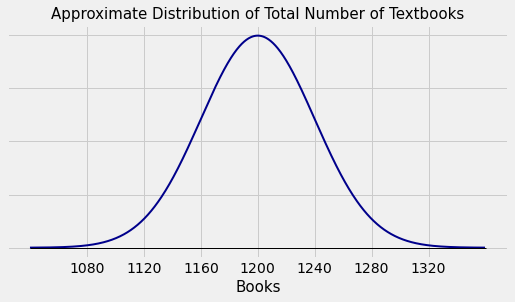

In [4]:
# NO CODE

plt.figure(figsize=(8,4))
z = np.arange(-4, 4, 0.01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, lw=2, color='darkblue')
plt.plot([-4, 4], [0, 0], color='k', lw=1)
phi1 = stats.norm.pdf(1)
labels = ['1080','1120','$1160$', '$1200$', '$1240$', '1280', '1320']
plt.xticks(np.arange(-3, 3.1), labels)
plt.yticks(np.arange(0, .41, .1), 5*[])
plt.xlabel('Books', size=15)
plt.title('Approximate Distribution of Total Number of Textbooks', size=15);

Let the total number of textbooks be $S$. We noted that the values on the horizontal axis are derived from the following calculations:

- $E(S) = 400 \times 3 = 1200$
- $SD(S) = \sqrt{400} \times 2 = 40$

What is the chance that the total number of textbooks is more than 1260?

We can't find this chance exactly. But the Central Limit Theorem gives us an approximation. 

The graph below shows the area we want to find. The curve is drawn on the original scale of $S$, measuring the number of books. Below that you see the standard units scale and the value 1260 in standard units:

$$
\frac{1260 - 1200}{40}  =  1.5
$$

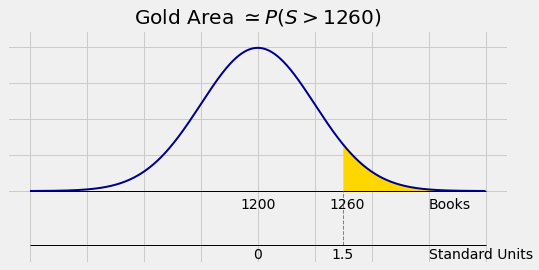

In [5]:
# NO CODE

plt.figure(figsize=(8,4))
z = np.arange(-4, 4.01, .01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, color='darkblue', lw=2)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
z0 = (1260 - 1200)/40
x = np.arange(z0, 4.01, .01)
phi_x = stats.norm.pdf(x)
plt.fill_between(x, phi_x, color='gold')
plt.text(z0-0.25, -0.05, '1260')
plt.text(0-0.3, -0.05, '1200')
plt.text(3, -0.05, 'Books')
plt.text(3, -.19, 'Standard Units')
plt.text(-0.08, -.19, '0')
plt.text(z0-0.2, -.19, str(z0))
plt.plot([z0, z0], [-0.15, 0], color='grey', lw=1, linestyle='--')
plt.plot([-4, 4], [-0.15, -0.15], color='k', lw=1)
tick_pos = np.arange(-4, 4.01)
tick_labs = 9*['']
plt.xticks(tick_pos, tick_labs)
plt.ylim(-0.2, 0.45)
plt.yticks(np.arange(0, .41, .1), 5*[])
plt.title('Gold Area $\simeq P(S > 1260)$');

The normal approximation to $P(S > 1260)$ is therefore

$$
1 - \Phi(1.5) ~ \approx ~ 6.7\%
$$

In [6]:
1 - stats.norm.cdf(1.5)

0.06680720126885809

Remember that $\Phi$ is the cdf of the *standard* normal curve, so you have to convert your value on the horizontal axis to standard units before applying $\Phi$.

### Average Rent ###

Suppose that the rents paid by a random group of 900 people are i.i.d., each with expectation 1500 dollars and SD 810 dollars. 

Fill in the blank: There is about 90% chance that the average rent of the 900 people is in the range 1500 dollars plus or minus $\underline{~~~~~~~~~~~~~~}$ dollars.

Let $A_{900}$ be the average rent paid by the 900 people. Then $E(A_{900}) = 1500$ and $SD(A_{900}) = \frac{810}{\sqrt{900}} = 27$.

We don't know the shape of the distribution of any individual's rent. But since the sample size is large, the Central Limit Theorem says that the distribution of the total rent paid by the sampled people is approximately normal. The average rent is the total rent divided by the constant 900, so it's just a change of units of measurement. The distribution of the average rents is thus also approximately normal.

Our goal is to find the distance $d$ shown in the figure below.

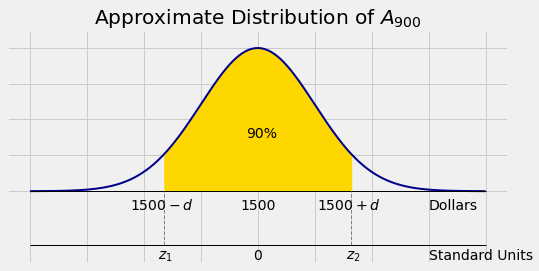

In [7]:
# NO CODE

plt.figure(figsize=(8,4))
z = np.arange(-4, 4.01, .01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, color='darkblue', lw=2)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
z1 = stats.norm.ppf(.05)
z2 = stats.norm.ppf(.95)
x = np.arange(z1, z2+.01, .01)
phi_x = stats.norm.pdf(x)
plt.fill_between(x, phi_x, color='gold')
plt.text(0-0.2, 0.15, '90%')
plt.text(0-0.3, -0.05, '1500')
plt.text(z1-0.6, -0.05, '$1500-d$')
plt.text(z2-0.6, -0.05, '$1500+d$')
plt.text(3, -0.05, 'Dollars')
plt.text(3, -.19, 'Standard Units')
plt.text(-0.08, -.19, '0')
plt.text(z1-0.1, -.19, '$z_1$')
plt.text(z2-0.1, -.19, '$z_2$')
plt.plot([z1, z1], [-0.15, 0], color='grey', lw=1, linestyle='--')
plt.plot([z2, z2], [-0.15, 0], color='grey', lw=1, linestyle='--')
plt.plot([-4, 4], [-0.15, -0.15], color='k', lw=1)
tick_pos = np.arange(-4, 4.01)
tick_labs = 9*['']
plt.xticks(tick_pos, tick_labs)
plt.ylim(-0.2, 0.45)
plt.yticks(np.arange(0, .41, .1), 5*[])
plt.title('Approximate Distribution of $A_{900}$');

Each of the two tails has area 5%, so $z_2$ is the 95th percentile of the standard normal curve. That is,

$$
z_2  =  \Phi^{-1}(0.95)  \approx 1.645
$$

In [8]:
stats.norm.ppf(0.95)

1.6448536269514722

This tells us that the right-most point $1500 + d$ is $1.645$ SDs above the center.

Since $SD(A_n) = 27$, we have $d = 1.645 \times 27 \approx 44.42$.

With chance about 90%, the average rent of the sampled individuals is in the range $1500 \pm 44.42$.

Don't worry about how many decimal places you should provide. The Central Limit Theorem only says that the distribution of a large random sample sum (or average) is *approximately* normal, so the answer is an approximation anyway.